| 주차 | 일정                               | 페이지                                  |
|-----:|-----------------------------------|----------------------------------------|
|    1 | 1장-헬로 파이썬                     | 0p ~ 45p                               |
|    2 | 2장-퍼셉트론                        | 46p ~ 62p                              |
|    3 | 3장-신경망                          | 63p ~ 105p                             |
|    4 | 4장-신경망 학습                     | 106p ~ 146p                            |
|    5 | 5장-오차역전파법                    | 147p ~ 187p (+ Appendix A, 292p ~ 299p) |
|    6 | 중간고사(전)                        |                                        |
|    7 | 중간고사                           |                                        |
|    8 | 6장-학습 관련 기술들               | 188p ~ 226p                            |
|    9 | 7장-합성곱 신경망(CNN)             | 227p ~ 259p                            |
|   10 | 딥러닝                             | 261p ~ 308p                            |
|   11 | 1장-신경망 복습                    | 0p ~ 74p (+ Appendix A, 389p ~ 394p)  |
|   12 | 2장-자연어와 단어의 분산 표현      | 78p ~ 113p (+ Appendix B, 395p ~ 399p) |
|   13 | 기말고사(전)                       |                                        |
|   14 | 기말고사                          |                                        |
|   15 | 3장-word2vec                       | 114p ~ 147p                            |
|   16 | 4장-word2vec 속도 개선             | 148p ~ 189p                            |
|   17 | 5장-순환신경망(RNN)                | 190p ~ 235p                            |
|   18 | 6장-게이트가 추가된 RNN            | 263p ~ 286p (+ Appendix C, 401p ~ 402p)|
|   19 | 7장-RNN을 사용한 문장 생성         | 287p ~ 333p                            |
|   20 | 8장-어텐션                         | 334p ~ 387p                            |

# 12주차

자연어와 단어의 분산 표현현

_78~113p_

---

### 자연어 처리란...

딱딱한 컴퓨터 언어가 아니라 사람들이 쓰고 말하는 언어


**단어의 의미**

말 < 단어 < 문자

단어들부터 의미의 최소 단위가 된다, 그래서 단어의 의미를 처음 알아내는 것이 가장 중요하다.

### Thesaurus (`/θɪˈsɔːr.əs/`, `th써러스`)

쉽게 말하면 뜻이 "비슷한" 단어들로 그룹이 되어 분류. 또, 상위/하위그룹 및 반의어 등도 포함이 되어있음.

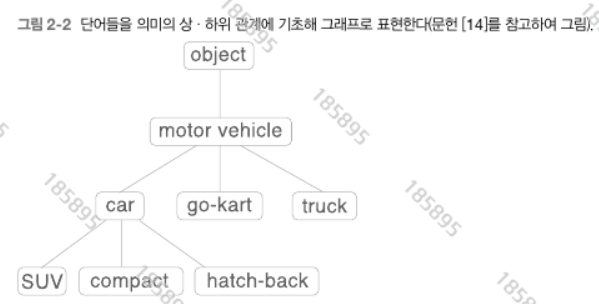

이런 단어들의 유의어 집합들을 만든 다음 이 단어 네트워크를 통해 단어의 관계를 컴퓨터에게도 표현이 가능!

https://neal.fun/infinite-craft/

**WordNet**

자연어 처리 부문에서 가장 오래되고 공신력있는 thesaurus, 지금까지 여러 자연어 처리 애플리케이션에 사용됨. 단어들의 "의미론적" 관계에 따라, 노드/링크 형태로 무수히 많이 연결이 되어있다. (약 15만개의 단어들들)

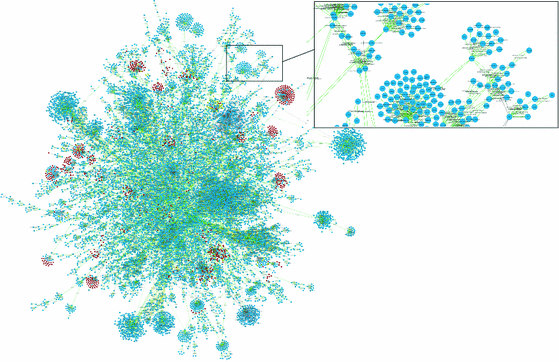

하지만, (이건 thesaurus 전반의 문제이기는 한) 이런 방식의 문제점이 있는데, 신조어등과같이 등제가 안된 단어들에 대하여는 적응을 할 수 없다. 사람들이 이걸 다 일일이 labeling을 매일같이 할수도 없고  현식적으로 어렵다. 문제점들을 정리하자면:

- 시대 변화에 적응이 어려움
- 사람의 손이 많이 간다
- 단어의 미묘한 차이를 표현 못함

위 문제들을 해결하기 위해 '통계 기반 기법', '추론 기반 기법'이 등장을 함.

### 통계 기반 기법

**Corpus/말뭉치란?**: 구조가 있는 다량의 텍스트, 단어 하나나 문자 하나는 Corpus라고 할 수 없다. 물론 또한 사람이 적은 어떤 정보가 들어있어야한다는 점도 있다.

이제 예시 Corpus를 전처리해본다면...

In [2]:
text = 'you say goodby and I say hello.'
text = text.lower().replace('.', ' .')
text

'you say goodby and i say hello .'

In [3]:
words = text.split()
words

['you', 'say', 'goodby', 'and', 'i', 'say', 'hello', '.']

단어들을 사용하기 쉽도록 ID 를 부여해본다, 이를 위해 대응표/translation table을 짜보겠다. (ID <-> 단어 쌍방)

In [12]:
w2i, i2w = {}, {}

for word in words:
    if word not in w2i:
        new_id = len(w2i)
        w2i[word] = new_id
        i2w[new_id] = word

w2i, i2w

({'you': 0, 'say': 1, 'goodby': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodby', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

이걸 사용하면, '인코딩' 및 '디코딩'이 가능하게 된다!

In [ ]:
test_words = ['i', 'say', 'hello', '.']

test_id_encode = [w2i[w] for w in test_words]
print(test_id_encode)  # 인코딩

test_id_decode = [i2w[i] for i in test_id_encode]
print(' '.join(test_id_decode))  # 다시 디코딩

[4, 1, 5, 6]
i say hello .


한대로 다 뭉쳐서 `preprocess`함수 제작

In [ ]:
import numpy as np

def preprocess(text: str) -> tuple[np.ndarray, dict, dict]:  
    words = text.lower().replace('.', ' .').split()
    w2i, i2w = {}, {}

    for word in words:
        if word not in w2i:
            new_id = len(w2i)
            w2i[word] = new_id
            i2w[new_id] = word
    
    corpus = np.array([w2i[w] for w in words])

    return corpus, w2i, i2w

In [ ]:
# 2.3.4 분산표현부터터